# Semántica de vectores y _embeddings_

In [1]:
# carga el corpus
with open('corpus.txt', 'r') as f:
    corpus = f.readlines()

In [2]:
# cada oración del corpus tiene un salto de línea al final
corpus

['hola mundo\n',
 'hola mundo de vectores\n',
 'hola vectores\n',
 'aguante la similitud coseno\n']

In [3]:
# quita saltos de línea al final de cada oración
corpus = list(map(str.strip, corpus))
corpus

['hola mundo',
 'hola mundo de vectores',
 'hola vectores',
 'aguante la similitud coseno']

## Matrices de co-ocurrencia

### Matrices término-término

In [4]:
import numpy as np
import pandas as pd
from copy import deepcopy
from itertools import combinations
from collections import defaultdict

In [5]:
words = sorted(' '.join(corpus).split())
words

['aguante',
 'coseno',
 'de',
 'hola',
 'hola',
 'hola',
 'la',
 'mundo',
 'mundo',
 'similitud',
 'vectores',
 'vectores']

In [6]:
w_combinations = list(set(combinations(words,2)))
w_combinations = sorted(w_combinations, key=lambda x:(x[0],x[1]))
w_combinations[:6]

[('aguante', 'coseno'),
 ('aguante', 'de'),
 ('aguante', 'hola'),
 ('aguante', 'la'),
 ('aguante', 'mundo'),
 ('aguante', 'similitud')]

In [7]:
term_term = defaultdict(int)
term_term

defaultdict(int, {})

In [8]:
# tamaño de la ventana para buscar la coocurrencia
window = 3

for sent in corpus:
    tokens = sent.split()
    if len(tokens) <= window:
        stop = 1
    else:
        stop = len(tokens) - window + 1
    for i in range(0, stop):
        span = tokens[i:i+window]
        for wc in w_combinations:
            if (wc[0] in span) and (wc[1] in span):
                if (wc[0] == wc[1]) and (span.count(wc[0]) == 2):
                    term_term[wc] += 1
                elif wc[0] != wc[1]:
                    term_term[wc] += 1

In [9]:
term_term

defaultdict(int,
            {('hola', 'mundo'): 2,
             ('de', 'hola'): 1,
             ('de', 'mundo'): 2,
             ('de', 'vectores'): 1,
             ('mundo', 'vectores'): 1,
             ('hola', 'vectores'): 1,
             ('aguante', 'la'): 1,
             ('aguante', 'similitud'): 1,
             ('la', 'similitud'): 2,
             ('coseno', 'la'): 1,
             ('coseno', 'similitud'): 1})

In [10]:
for wc in w_combinations:
    if wc not in term_term.keys():
        term_term[wc] = 0

In [11]:
term_term

defaultdict(int,
            {('hola', 'mundo'): 2,
             ('de', 'hola'): 1,
             ('de', 'mundo'): 2,
             ('de', 'vectores'): 1,
             ('mundo', 'vectores'): 1,
             ('hola', 'vectores'): 1,
             ('aguante', 'la'): 1,
             ('aguante', 'similitud'): 1,
             ('la', 'similitud'): 2,
             ('coseno', 'la'): 1,
             ('coseno', 'similitud'): 1,
             ('aguante', 'coseno'): 0,
             ('aguante', 'de'): 0,
             ('aguante', 'hola'): 0,
             ('aguante', 'mundo'): 0,
             ('aguante', 'vectores'): 0,
             ('coseno', 'de'): 0,
             ('coseno', 'hola'): 0,
             ('coseno', 'mundo'): 0,
             ('coseno', 'vectores'): 0,
             ('de', 'la'): 0,
             ('de', 'similitud'): 0,
             ('hola', 'hola'): 0,
             ('hola', 'la'): 0,
             ('hola', 'similitud'): 0,
             ('la', 'mundo'): 0,
             ('la', 'vectores'): 0,
   

In [12]:
word, context, n = list(), list(), list()
for key, value in term_term.items():
    word.append(key[0])
    context.append(key[1])
    n.append(value)

In [13]:
term_term_df = pd.DataFrame({'word':word,'context':context,'n':n})
term_term_df.head()

,word,context,n
0,hola,mundo,2
1,de,hola,1
2,de,mundo,2
3,de,vectores,1
4,mundo,vectores,1


In [14]:
pd.pivot_table(term_term_df, values='n', index='word', columns='context', fill_value=0)

context,coseno,de,hola,la,mundo,similitud,vectores
word,,,,,,,
aguante,0,0,0,1,0,1,0
coseno,0,0,0,1,0,1,0
de,0,0,1,0,2,0,1
hola,0,0,0,0,2,0,1
la,0,0,0,0,0,2,0
mundo,0,0,0,0,0,0,1
similitud,0,0,0,0,0,0,0
vectores,0,0,0,0,0,0,0


### Matrices término-docuemnto

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
# CountVectorizer?

In [17]:
count_vec = CountVectorizer()
X = count_vec.fit_transform(corpus)
X

<4x8 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [18]:
X = X.toarray()
X

array([[0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 1, 0, 1, 0]])

In [19]:
count_vec.get_feature_names_out()

array(['aguante', 'coseno', 'de', 'hola', 'la', 'mundo', 'similitud',
       'vectores'], dtype=object)

In [20]:
term_doc = pd.DataFrame(
    X,
    columns=count_vec.get_feature_names_out(),
    index=corpus
)
term_doc

,aguante,coseno,de,hola,la,mundo,similitud,vectores
hola mundo,0,0,0,1,0,1,0,0
hola mundo de vectores,0,0,1,1,0,1,0,1
hola vectores,0,0,0,1,0,0,0,1
aguante la similitud coseno,1,1,0,0,1,0,1,0


In [21]:
term_doc = term_doc.T
term_doc

,hola mundo,hola mundo de vectores,hola vectores,aguante la similitud coseno
aguante,0,0,0,1
coseno,0,0,0,1
de,0,1,0,0
hola,1,1,1,0
la,0,0,0,1
mundo,1,1,0,0
similitud,0,0,0,1
vectores,0,1,1,0


In [22]:
# vector del documento => vecotr columna
term_doc["hola mundo"].to_numpy()

array([0, 0, 0, 1, 0, 1, 0, 0])

In [23]:
# vector de la palabra => vector fila
term_doc.loc["hola"].to_numpy()

array([1, 1, 1, 0])

In [24]:
sents = ["similitud de vectores", "el aguante"]
Y = count_vec.transform(sents).toarray()
pd.DataFrame(
    Y,
    columns=count_vec.get_feature_names_out(),
    index=sents
)

,aguante,coseno,de,hola,la,mundo,similitud,vectores
similitud de vectores,0,0,1,0,0,0,1,1
el aguante,1,0,0,0,0,0,0,0


## Similitud coseno

### Producto punto (_dot product_)

$$
\text{dot product}(v,w) = v \cdot w = \sum_{i=1}^Nv_iw_i = v_iw_i+v_iw_i+...+v_Nw_N
$$

In [25]:
dp_df = pd.DataFrame(
    {
        "texto_jardinería":[6,4,8,1,0,15],
        "texto_transporte":[0,0,1,7,8,13],
        "texto_industria":[4,0,0,2,6,10]
    },
    index=["planta","flor","tierra","asfalto","auto","de"]
)
dp_df

,texto_jardinería,texto_transporte,texto_industria
planta,6,0,4
flor,4,0,0
tierra,8,1,0
asfalto,1,7,2
auto,0,8,6
de,15,13,10


In [26]:
vec_planta = dp_df.loc["planta"].to_numpy()
vec_planta

array([6, 0, 4])

In [27]:
vec_flor = dp_df.loc["flor"].to_numpy()
vec_flor

array([4, 0, 0])

In [28]:
vec_de = dp_df.loc["de"].to_numpy()
vec_de

array([15, 13, 10])

In [29]:
def calculate_dot_product(x:np.array, y:np.array, quiet: bool=False) -> np.array:
    vec = x * y
    total = vec.sum()
    if not quiet:
        print(f"""
        Producto de las componentes del vector {x} y el vector {y}: {vec}
        Cálculo:
            < {', '.join([f'{m} * {n}' for m,n in list(zip(x,y))])} >
    
        Suma de todas las componentes de  {vec} = {total}
        Cálculo:
            {' + '.join(list(map(str,vec)))}
        """)
    return total

In [30]:
vec_planta_flor = calculate_dot_product(vec_planta, vec_flor)


        Producto de las componentes del vector [6 0 4] y el vector [4 0 0]: [24  0  0]
        Cálculo:
            < 6 * 4, 0 * 0, 4 * 0 >
    
        Suma de todas las componentes de  [24  0  0] = 24
        Cálculo:
            24 + 0 + 0
        


In [31]:
vec_planta_de = calculate_dot_product(vec_planta, vec_de)


        Producto de las componentes del vector [6 0 4] y el vector [15 13 10]: [90  0 40]
        Cálculo:
            < 6 * 15, 0 * 13, 4 * 10 >
    
        Suma de todas las componentes de  [90  0 40] = 130
        Cálculo:
            90 + 0 + 40
        


### Similitud coseno

La similitud coseno utiliza el producto punto normalizado por la norma de cada vector.

Dicha norma se define como:

$$
\vert v \vert = \sqrt{\sum_{i=1}^Nv_i^2}
$$

Y el coseno queda definido del siguiente modo:

$$
cosine(v,w) = \frac{v \cdot w}{\vert v \vert \vert w \vert} = \frac{\sum_{i=1}^Nv_iw_i}{\sqrt{\sum_{i=1}^Nv_i^2} \sqrt{\sum_{i=1}^Nw_i^2}}
$$

In [32]:
from math import sqrt

In [33]:
def calculate_norm(x: np.array, quiet: bool=False) -> float:
    _norm = (x**2)
    _norm_sum = _norm.sum()
    norm = sqrt(_norm_sum)
    if not quiet:
        print(f"""
        Norma del vector {x}: {norm}
        Cálculo
            - < {', '.join([f'{i}**2' for i in list(map(str,x))])} > = < {', '.join(list(map(str,_norm)))} >
            - < {' + '.join(list(map(str,_norm)))} > = {_norm_sum}
            - sqrt( {_norm_sum} ) = {norm}
        """)
    return norm

In [34]:
norm_planta = calculate_norm(vec_planta)
norm_flor = calculate_norm(vec_flor)
norm_de = calculate_norm(vec_de)


        Norma del vector [6 0 4]: 7.211102550927978
        Cálculo
            - < 6**2, 0**2, 4**2 > = < 36, 0, 16 >
            - < 36 + 0 + 16 > = 52
            - sqrt( 52 ) = 7.211102550927978
        

        Norma del vector [4 0 0]: 4.0
        Cálculo
            - < 4**2, 0**2, 0**2 > = < 16, 0, 0 >
            - < 16 + 0 + 0 > = 16
            - sqrt( 16 ) = 4.0
        

        Norma del vector [15 13 10]: 22.22611077089287
        Cálculo
            - < 15**2, 13**2, 10**2 > = < 225, 169, 100 >
            - < 225 + 169 + 100 > = 494
            - sqrt( 494 ) = 22.22611077089287
        


In [35]:
def calculate_cosine(x: np.array, y: np.array, quiet: bool=False) -> float:
    dot_x_y = calculate_dot_product(x, y, quiet=quiet)
    x_norm, y_norm = calculate_norm(x, quiet=quiet), calculate_norm(y, quiet=quiet)
    cosine = dot_x_y / (x_norm*y_norm)
    if not quiet:
        print(f"""
        cosine = {dot_x_y} / ( {x_norm} * {y_norm}) = {cosine}
        """)
    return cosine

In [36]:
calculate_cosine(vec_planta, vec_flor, quiet=True)

0.8320502943378437

In [37]:
calculate_cosine(vec_planta, vec_de, quiet=True)

0.8111071056538126

**¿Cómo interpretar el coseno?**

Simplifiquemos mucho la situación. Supongamos que tenemos solo dos documentos: uno sobre jardinería y otro sobre yoga. Y tenemos las palabras _maceta_, _tierra_, _mat_. Las primeras dos aparecen con cierta frecuencia en el documento de jardinería, pero nunca en el de yoga, y la última solo aparece en este documento.

Cada palabra se representará con un vector de dos dimensiones ( $\mathbb{R}^2$ ), en el que la primera dimensión representará el número de ocurrencias de la palabra en el **documento "jardín"** y la segunda, las ocurrencias en el **documento "yoga"**.

In [38]:
import matplotlib.pyplot as plt
from itertools import combinations

In [39]:
maceta = np.array([5, 0])
tierra = np.array([3, 1])
mat = np.array([0, 6])
non_existent_word = np.array([0,-2])

In [40]:
cosines = dict()
for c in list(combinations(["maceta","tierra","mat","non_existent_word"], 2)):
    w1, w2 = eval(c[0]), eval(c[1])
    cosines[f"{c[0]}-{c[1]}"] = calculate_cosine(w1, w2, quiet=True)
cosines

{'maceta-tierra': 0.9486832980505138,
 'maceta-mat': 0.0,
 'maceta-non_existent_word': 0.0,
 'tierra-mat': 0.31622776601683794,
 'tierra-non_existent_word': -0.31622776601683794,
 'mat-non_existent_word': -1.0}

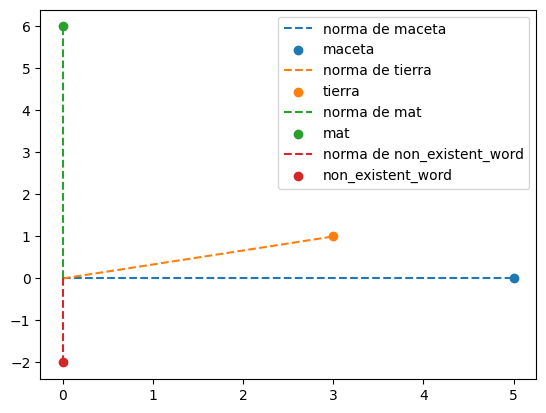

In [41]:
fig, ax = plt.subplots()

for word in ["maceta","tierra","mat","non_existent_word"]:
    vec = eval(word)
    x, y = list(zip([0,0],vec))
    ax.plot(x, y, '--', label=f"norma de {word}")
    ax.scatter(x=vec[0], y=vec[1], label=word)
plt.legend()
plt.show()

## TF-IDF

In [66]:
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import ParameterGrid
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
params = {
    "norm" : [None,"l1","l2"],
    "use_idf": [False,True],
    "smooth_idf" : [False,True],
    "sublinear_tf" : [False,True]
}
params_grid = list(ParameterGrid(params))
params_grid[:3]

[{'norm': None, 'smooth_idf': False, 'sublinear_tf': False, 'use_idf': False},
 {'norm': None, 'smooth_idf': False, 'sublinear_tf': False, 'use_idf': True},
 {'norm': None, 'smooth_idf': False, 'sublinear_tf': True, 'use_idf': False}]

In [44]:
len(params_grid)

24

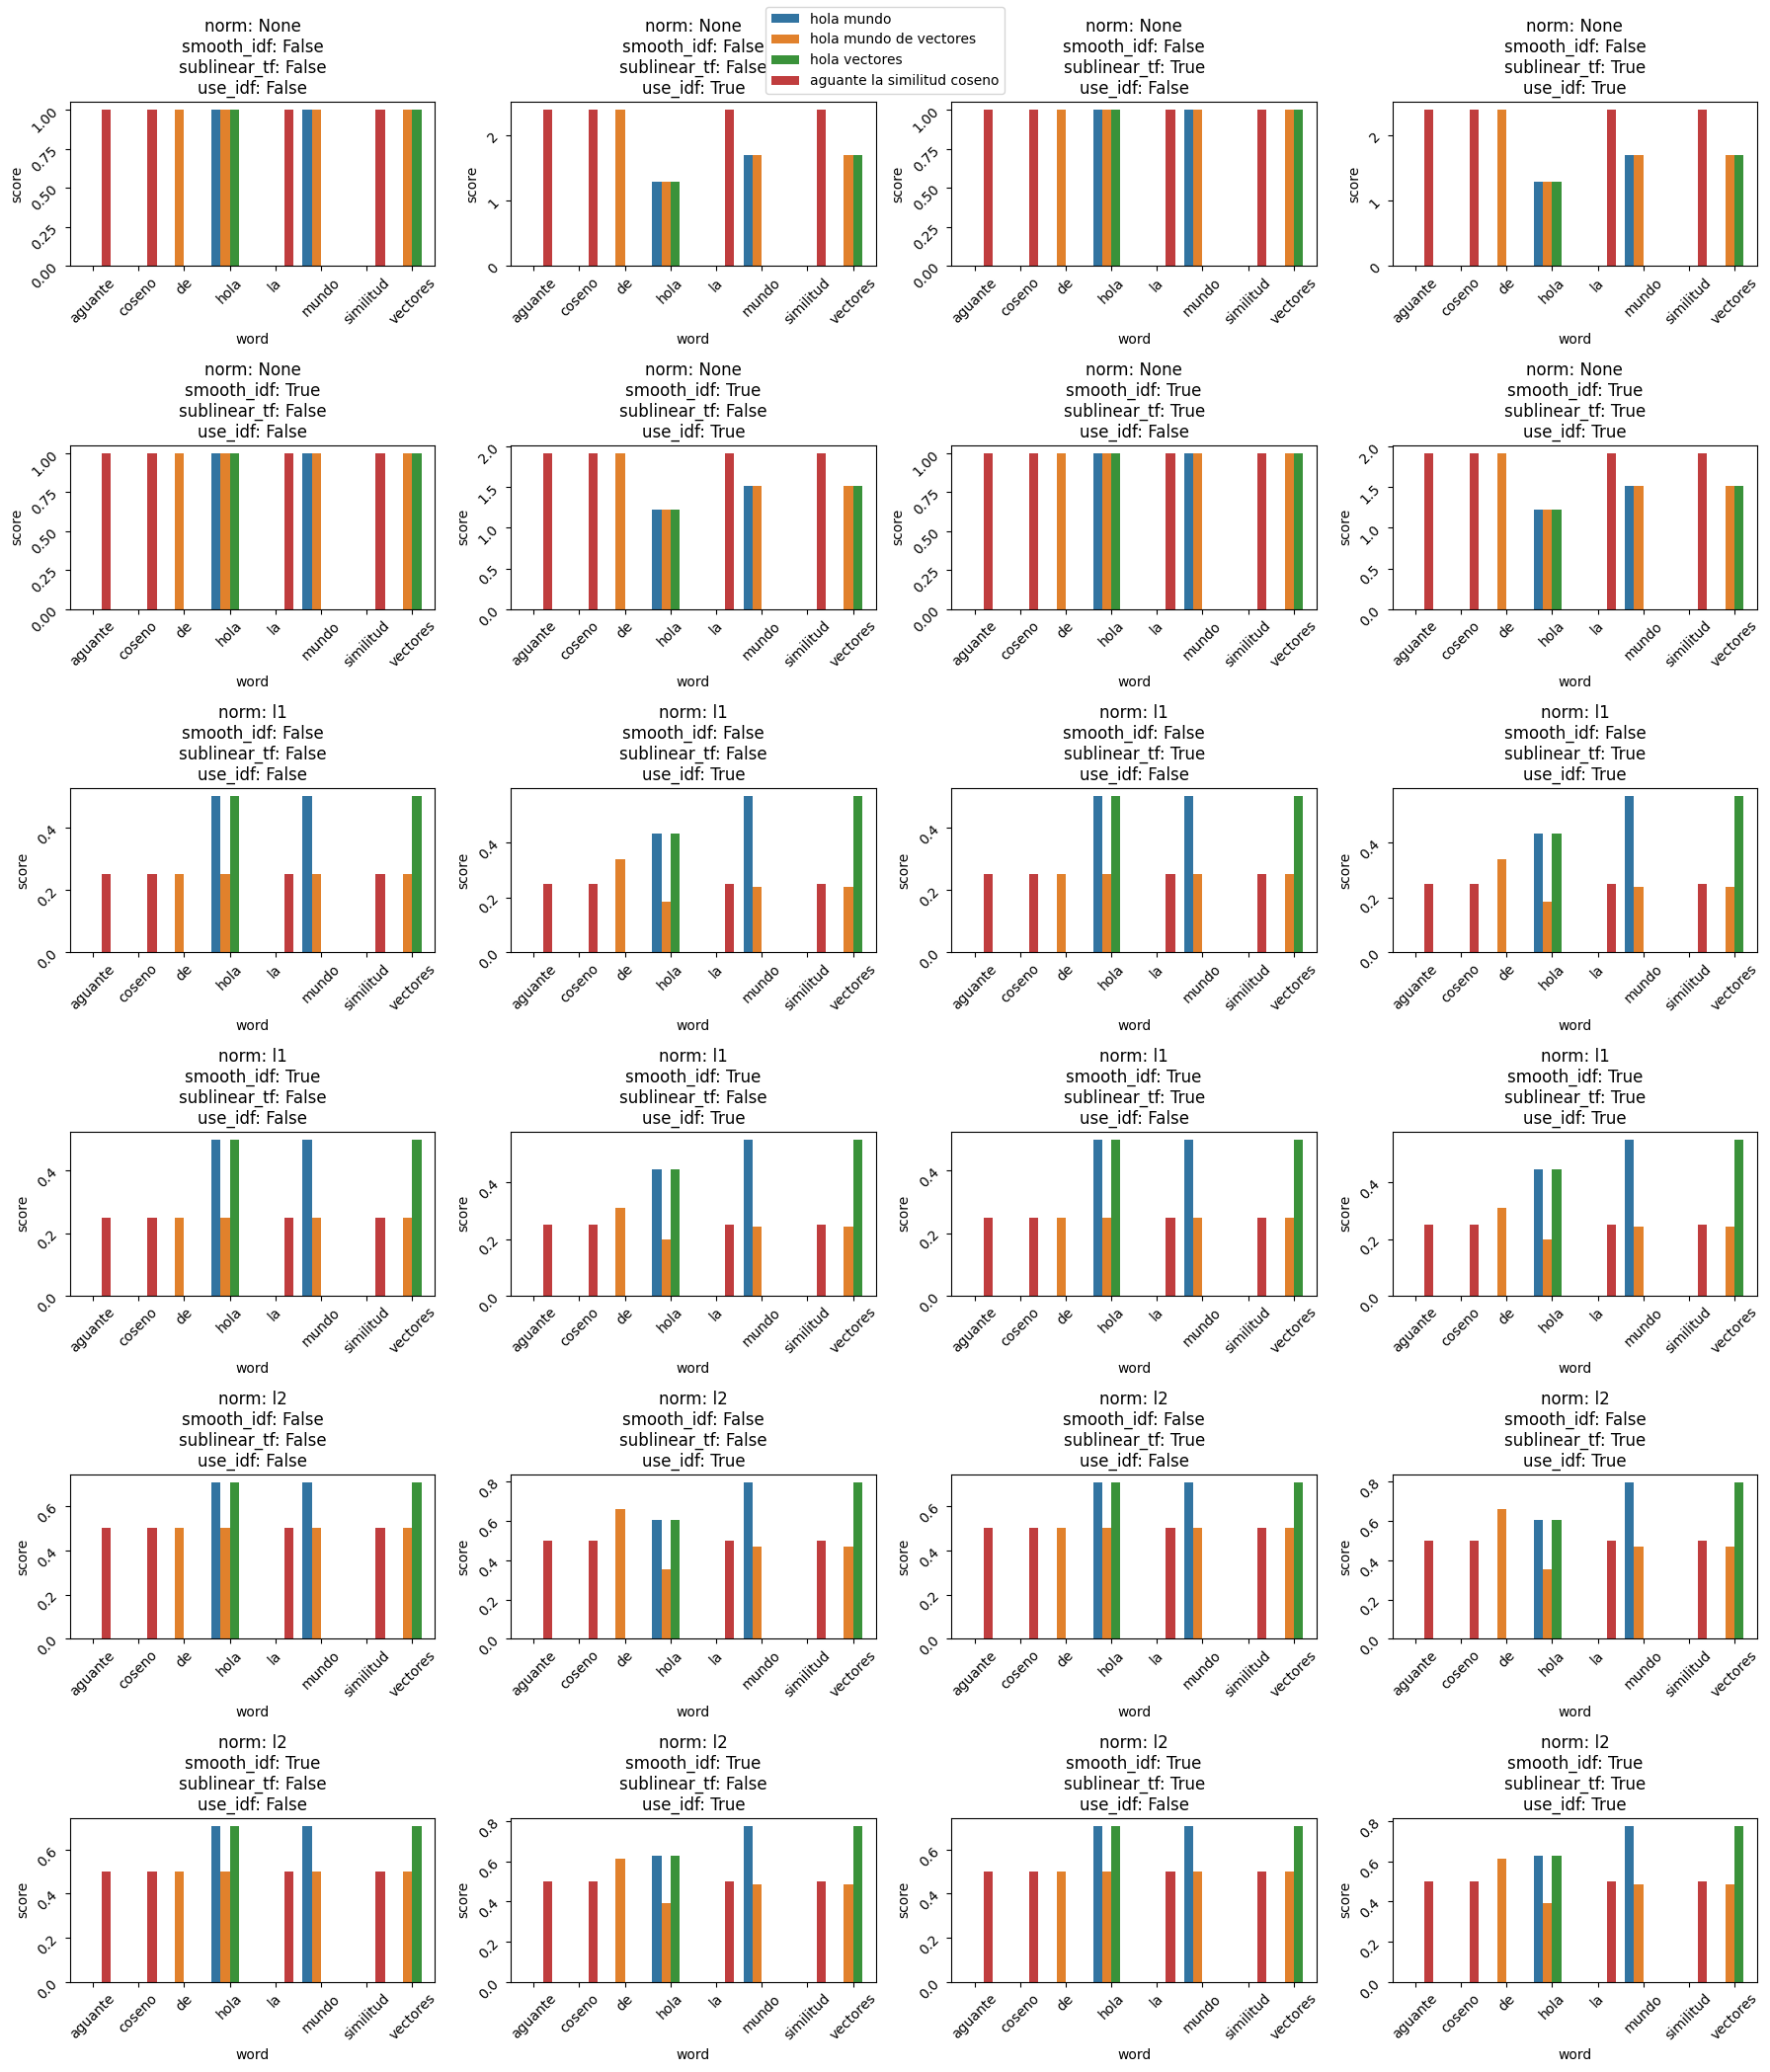

In [70]:
fig, axs = plt.subplots(6,4, figsize=(18,21))
row, col = 0, 0
for pg in params_grid:
    vectorizer = TfidfVectorizer(**pg)
    X = vectorizer.fit_transform(corpus).toarray()
    df = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())
    df["doc"] = corpus
    df = df.melt(id_vars=['doc'], var_name=['word'], value_name='score')
    sns.barplot(data=df, x="word", y="score", hue="doc", ax=axs[row,col])
    axs[row,col].set_title("\n".join([f"{k}: {v}" for k,v in pg.items()]))
    axs[row,col].tick_params(labelrotation=45,)
    handles, labels = axs[row,col].get_legend_handles_labels()
    axs[row,col].get_legend().remove()
    col += 1
    if col > 3:
        row += 1
        col = 0
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show()

## _Pointwise Mutual Information (PMI)_

TBD

## Word2vec

TBD